## Problem

The data gives the details of third party motor insurance claims in Sweden for the
year 1977. In Sweden, all motor insurance companies apply identical risk
arguments to classify customers, and thus their portfolios and their claims
statistics can be combined. The data were compiled by a Swedish Committee on
the Analysis of Risk Premium in Motor Insurance. The Committee was asked to
look into the problem of analyzing the real influence on the claims of the risk
arguments and to compare this structure with the actual tariff.

The insurance dataset holds 7 variables and the description of these variables are
given below:

Variable Description

## Kilometers Kilometers travelled per year

1: < 1000

2: 1000-15000

3: 15000-20000

4: 20000-25000

5: > 25000

## Zone Geographical zone

1: Stockholm, Göteborg, and Malmö with surroundings

2: Other large cities with surroundings

3: Smaller cities with surroundings in southern Sweden

4: Rural areas in southern Sweden

5: Smaller cities with surroundings in northern Sweden

6: Rural areas in northern Sweden

7: Gotland

### Bonus : No claims bonus; equal to the number of years, plus one, since the last claim

### Make : 1-8 represents eight different common car models. All other models are combined in class 9.

### Insured : Number of insured in policy-years

### Claims : Number of claims

### Payment : Total value of payments in Skr (Swedish Krona)

After understanding the data, you need to help the committee with the following:
 1. The committee is interested to know each field of the data collected
through descriptive analysis to gain basic insights into the data set and to
prepare for further analysis.
 2. The total value of payment by an insurance company is an important factor
to be monitored. So the committee has decided to find whether this
payment is related to number of claims and the number of insured policy
years. They also want to visualize the results for better understanding.
 3. The committee wants to figure out the reasons for insurance payment
increase and decrease. So they have decided to find whether distance,
location, bonus, make, and insured amount or claims are affecting the
payment or all or some of these are affecting it.
 4. The insurance company is planning to establish a new branch office, so they
are interested to find at what location, kilometer, and bonus level their
insured amount, claims, and payment get increased. 
 5. The committee wants to understand what affects their claim rates so as to
decide the right premiums for a certain set of situations. Hence, they need
to find whether the insured amount, zone, kilometer, bonus, or make
affects the claim rates and to what extent.

## $\color{red}{\text{1. Data loading}}$

In [62]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
ins_data = pd.read_csv("SwedishMotorInsurance.csv")

Let's look at some statistical information about our dataframe.

## $\color{red}{\text{2. Exploratory Analysis |Preprocessing}}$

In [64]:
ins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Kilometres  2182 non-null   int64  
 1   Zone        2182 non-null   int64  
 2   Bonus       2182 non-null   int64  
 3   Make        2182 non-null   int64  
 4   Insured     2182 non-null   float64
 5   Claims      2182 non-null   int64  
 6   Payment     2182 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 119.5 KB


In [65]:
ins_data.head()

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
0,1,1,1,1,455.13,108,392491
1,1,1,1,2,69.17,19,46221
2,1,1,1,3,72.88,13,15694
3,1,1,1,4,1292.39,124,422201
4,1,1,1,5,191.01,40,119373


In [66]:
ins_data.describe()

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
count,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2.182000e+03
mean,2.985793,3.970211,4.015124,4.991751,1092.195270,51.865720,2.570076e+05
std,1.410409,1.988858,2.000516,2.586943,5661.156245,201.710694,1.017283e+06
min,1.000000,1.000000,1.000000,1.000000,0.010000,0.000000,0.000000e+00
25%,2.000000,2.000000,2.000000,3.000000,21.610000,1.000000,2.988750e+03
50%,3.000000,4.000000,4.000000,5.000000,81.525000,5.000000,2.740350e+04
75%,4.000000,6.000000,6.000000,7.000000,389.782500,21.000000,1.119538e+05
max,5.000000,7.000000,7.000000,9.000000,127687.270000,3338.000000,1.824503e+07


Checking any missing values present.

In [67]:
ins_data[ins_data.isnull().any(axis=1)]

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment


No missing values

In [68]:
ins_data.isnull().sum()

Kilometres    0
Zone          0
Bonus         0
Make          0
Insured       0
Claims        0
Payment       0
dtype: int64

The value of payment need to be observed. So Payment is dependent variable and other variables Kilometres, Zone,
Bonus, Make, Insured and claims are independent variables.

In [69]:
ins_data.columns

Index(['Kilometres', 'Zone', 'Bonus', 'Make', 'Insured', 'Claims', 'Payment'], dtype='object')

In [70]:
ins_data.shape

(2182, 7)


## $\color{blue}{\text{3. Linear Regression}}$

## $\color{red}{\text{Q.1 The committee is interested to know each field of the data collected through descriptive analysis to gain basic }}$
## $\color{red}{\text{insights into the data set and to prepare for further analysis.}}$

In [71]:
X = ins_data[[ 'Insured', 'Claims']] # independent variables
y = ins_data[['Payment']]
      

Let's split data into train and test data for modeling

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 100 )

In [73]:
print(X_train.shape)
print(X_test.shape)

(1745, 2)
(437, 2)


In [74]:
print(len(X_train))
print(len(X_test))

1745
437


In [75]:
import statsmodels.api as sm
#X_train = sm.add_constant(X_train)
first_linear_model = sm.OLS(y_train,X_train).fit()

In [76]:
# print the coefficients
first_linear_model.params

Insured      28.265806
Claims     4288.988797
dtype: float64

In [77]:
pred = first_linear_model.predict(X_test)

In [78]:
pred

1818     18380.429889
225     142226.638748
1129    574927.260583
1507     87406.384073
1750       594.429894
            ...      
1688     10961.632988
1865     51144.569302
551     101334.384248
1065    400877.426678
2114     14261.883901
Length: 437, dtype: float64

In [167]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)

# create a fitted model in one line
lm_1 = sm.OLS(y_train,X_train).fit()

# print the coefficients
lm_1.params

const        -24983.577564
Kilometres     5118.780218
Zone           2207.513376
Bonus          1559.696220
Make           -587.513229
Insured          27.874803
Claims         4302.909148
dtype: float64

In [168]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                Payment   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 6.589e+04
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:11:05   Log-Likelihood:                -21990.
No. Observations:                1745   AIC:                         4.399e+04
Df Residuals:                    1738   BIC:                         4.403e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.498e+04   7154.984     -3.492      0.0


## $\color{green}{\text{Here p value is less than 0.05 then we can say that insured and Claims }}$
## $\color{green}{\text{ significant variables.To find how much they can affect.}}$
## $\color{green}{\text{ Let's find correlation.}}$

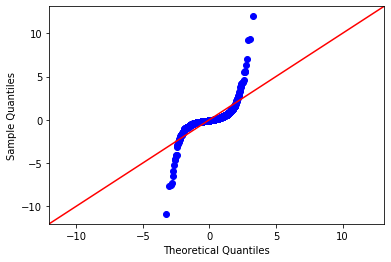

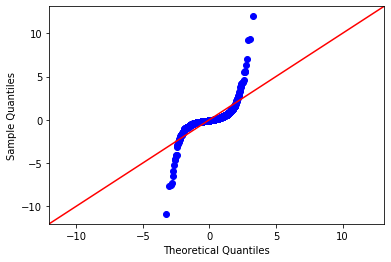

In [169]:
error = lm_1.resid
sm.qqplot(error, fit = 'True',line = '45')

std err represents the average distance that the observed values fall from the regression line. Conveniently, it tells you how wrong the regression model is on average using the units of the response variable. Smaller values are better because it indicates that the observations are closer to the fitted line

## $\color{blue}{\text{4. Check correlation with Insured with payment}}$


## $\color{red}{\text{Q.2 The total value of payment by an insurance company is an important factor to be}}$
## $\color{red}{\text{monitored.So the committee has decided to find whether payment is related to number of }}$
## $\color{red}{\text{ insured policy years.They also want to visualize the results for better understanding}}$ 


In [170]:
ins_data['Insured'].corr(ins_data['Payment'], method='spearman') 

0.9030321473633566

In [171]:
ins_data['Claims'].corr(ins_data['Payment'], method='spearman') 

0.9624432754165474

In [172]:
corr = ins_data.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
Kilometres,1.000000,-0.013928,0.007206,-0.002677,-0.329021,-0.264260,-0.242175
Zone,-0.013928,1.000000,0.011674,-0.005189,-0.320061,-0.386822,-0.363449
Bonus,0.007206,0.011674,1.000000,0.002157,0.351141,0.197773,0.202058
Make,-0.002677,-0.005189,0.002157,1.000000,0.111041,0.112388,0.118209
Insured,-0.329021,-0.320061,0.351141,0.111041,1.000000,0.933337,0.903032
Claims,-0.264260,-0.386822,0.197773,0.112388,0.933337,1.000000,0.962443
Payment,-0.242175,-0.363449,0.202058,0.118209,0.903032,0.962443,1.000000


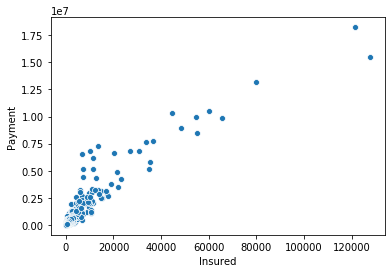

In [186]:
sns.scatterplot(data=ins_data, x="Insured", y="Payment", palette="deep")

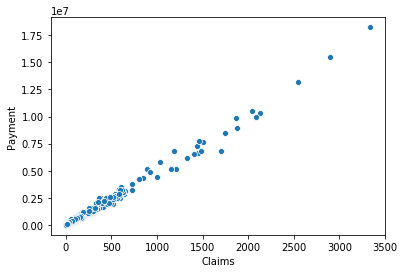

In [187]:
sns.scatterplot(data=ins_data, x="Claims", y="Payment",palette="deep")


## $\color{red}{\text{Q.3 The committee wants to figure out the reasons for insurance payment increase and decrease.}}$
## $\color{red}{\text{So they have decided to find whether distance,location, bonus, make, insured amount or claims }}$
## $\color{red}{\text{claims are affecting the payment or all or some of these are affecting it.}}$

## $\color{blue}{\text{5. Multiple linear regression}}$

Dependent variable = payment

Independent variable = distance, location, bonus, make, insured amount, claims

In [224]:
X1 = ins_data[[ 'Kilometres', 'Zone', 'Bonus', 'Make', 'Insured', 'Claims']] # independent variables
y1 = ins_data[['Payment']] # dependent variable
X2 = sm.add_constant(X1)
est = sm.OLS(y1, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                Payment   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 7.462e+04
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:12:39   Log-Likelihood:                -27461.
No. Observations:                2182   AIC:                         5.494e+04
Df Residuals:                    2175   BIC:                         5.498e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.173e+04   6338.112     -3.429      0.0

## $\color{green}{\text{Bonus and Make variable has P value greater than 0.05. So they are insignificant variables and others are }}$
## $\color{green}{\text{significant variables. So distance,location, and insured amount and claims are affecting the payment.}}$

## $\color{magenta}{\text{Let's check with sklearn}}$

In [212]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X1,y1)
print(lm.intercept_)
print(lm.coef_)
print(lm.score(X1,y1))

[-21733.74151754]
[[4768.56411089 2322.89665552 1182.89834626 -754.26761348   27.88015662
  4315.87784346]]
0.9951652619634151


## $\color{magenta}{\text{we got same coefficients.}}$

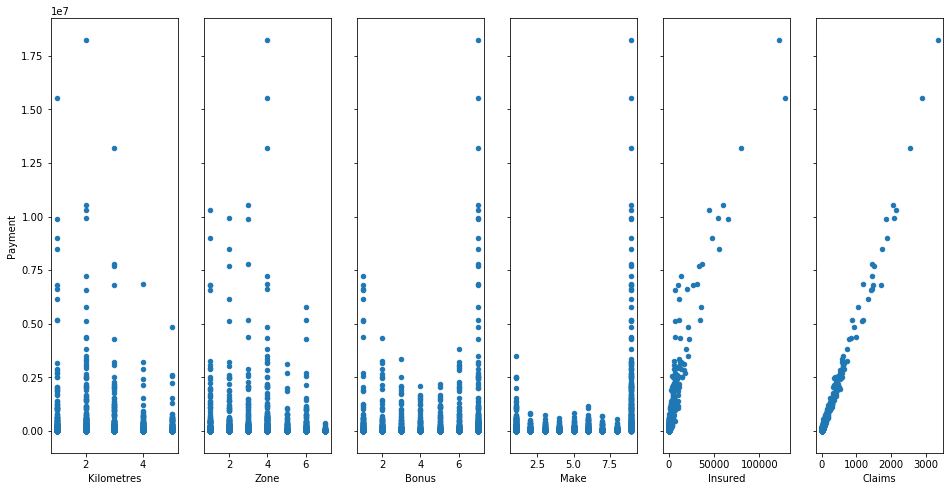

In [213]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 6, sharey=True)
ins_data.plot(kind='scatter', x='Kilometres', y='Payment', ax=axs[0], figsize=(16, 8))
ins_data.plot(kind='scatter', x='Zone', y='Payment', ax=axs[1])
ins_data.plot(kind='scatter', x='Bonus', y='Payment', ax=axs[2])
ins_data.plot(kind='scatter', x='Make', y='Payment', ax=axs[3], figsize=(16, 8))
ins_data.plot(kind='scatter', x='Insured', y='Payment', ax=axs[4])
ins_data.plot(kind='scatter', x='Claims', y='Payment', ax=axs[5])

In [214]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=0.8, random_state = 100 )

In [215]:
# Prediction
y_pred = lm.predict(X_test)
#print(y_pred)

In [216]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [217]:
from math import sqrt
rmse = sqrt(mse)

In [218]:
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 4301058741.597774
Root_Mean_Squared_Error : 65582.45757516085
r_square_value : 0.9904358335038108


### 
## $\color{red}{\text{4. The insurance company is planning to establish a new branch office, so they are interested to find at what }}$
## $\color{red}{\text{location, kilometer, and bonuslevel their insured amount, claims, and payment get increased. }}$

In [219]:
ins_data2 = ins_data.groupby(['Zone']).mean()
ins_data2 = ins_data2.drop(columns = ['Kilometres', 'Bonus', 'Make'])
ins_data2 = ins_data2.sort_values(by = 'Payment',ascending = False)
display(ins_data2)


,Insured,Claims,Payment
Zone,,,
4,2689.380413,101.311111,537071.755556
1,1036.171746,73.568254,338518.946032
2,1231.481841,67.625397,319921.517460
3,1362.958698,63.295238,307550.853968
6,802.684571,32.577778,175528.469841
5,384.801885,19.047923,93001.843450
7,64.910714,2.108844,9948.190476


## $\color{magenta}{\text{Zone 4 has highest number of claims and highest payment as well.}}$

In [220]:
ins_data3 = ins_data.groupby(['Kilometres']).mean()
ins_data3 = ins_data3.drop(columns = ['Zone', 'Bonus', 'Make'])
ins_data3 = ins_data3.sort_values(by = 'Payment',ascending = False)
display(ins_data3)

,Insured,Claims,Payment
Kilometres,,,
2,1824.028844,89.276644,442523.780045
1,1837.816287,75.594533,361899.350797
3,1081.971383,54.160998,272012.582766
4,398.963226,20.794931,108213.405530
5,284.947518,18.042155,93306.117096


## $\color{magenta}{\text{Kilometer group 2 has highest amount of payment}}$

In [221]:
ins_data4 = ins_data.groupby(['Bonus']).mean()
ins_data4 = ins_data4.drop(columns = ['Kilometres','Zone', 'Make'])
ins_data4 = ins_data4.sort_values(by = 'Payment',ascending = False)
display(ins_data4)

,Insured,Claims,Payment
Bonus,,,
7,4620.372762,157.222222,819322.476190
1,525.550195,62.504886,282921.993485
6,805.816730,39.942857,197723.819048
2,451.075449,34.233974,163316.625000
3,397.473742,24.974194,122656.174194
5,437.393610,22.821086,108790.504792
4,360.386710,20.351613,98498.119355


## $\color{magenta}{\text{For the Bonus level 7 there is highest number of claims as well as payment.}}$


## $\color{red}{\text{ 5. The committee wants to understand what affects their claim rates so as to decide the right premiums for a }}$
## $\color{red}{\text{certain set of situations.Hence, they need to find whether the insured amount, zone, kilometer, bonus, or make }}$
## $\color{red}{\text{affects the claim rates and to what extent.}}$

Dependent variable = Claims

Independent variable = insured amount, zone, Kilometres, bonus, make

In [223]:
X3 = ins_data[[ 'Kilometres', 'Zone', 'Bonus', 'Make', 'Insured']] # independent variables
y3 = ins_data[['Claims']] # dependent variable
X3 = sm.add_constant(X3)
est2 = sm.OLS(y3, X3)
est3 = est2.fit()
print(est3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Claims   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     2328.
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:10:39   Log-Likelihood:                -12659.
No. Observations:                2182   AIC:                         2.533e+04
Df Residuals:                    2176   BIC:                         2.536e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.1230      7.127      5.209      0.0


## $\color{green}{\text{It shows that P value for all variables Kilometres, Zone, Bonus, Make and Isured amount are less than 0.05.}}$
## $\color{green}{\text{So they are significant variables for the Claims.}}$